In [1]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from src.loading import *

In [8]:
# Make plots of chosen variables
# Overlay will be circulation 
# For consistency, we make the plotting as a function
#

def _make_phase_composite_plots(shading_var, cmap, norm, levels, circulation_overlay=True):
    for phase in range(1, 9):
        fig, ax = plt.subplots()

        var = load_phase_composite_anomaly(shading_var, phase=phase)
        var = var.coarsen({'column': 5}).mean()
        var.plot.contourf(ax=ax, y='z', cmap=cmap, norm=norm, levels=levels)

        if circulation_overlay:
            circ = load_phase_composite_anomaly('wa', phase=phase).cumsum('column')
            circ = circ.coarsen({'column': 5}).mean()
            circ.plot.contour(ax=ax, y='z', levels=np.linspace(-150, 0, 20), colors='black')

        ax.set_ylim(0, 17e3)
        ax.set_ylabel('Altitude [m]')
        ax.set_xlabel('Column Rank')
        
                

# Vertical velocity

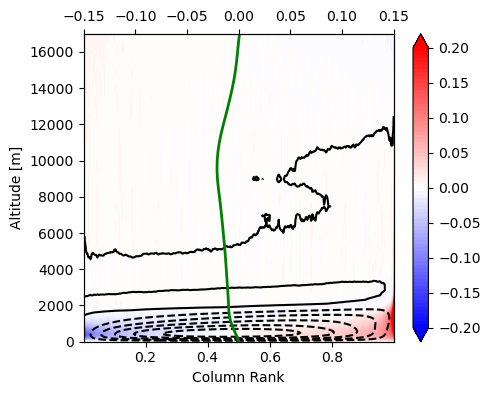

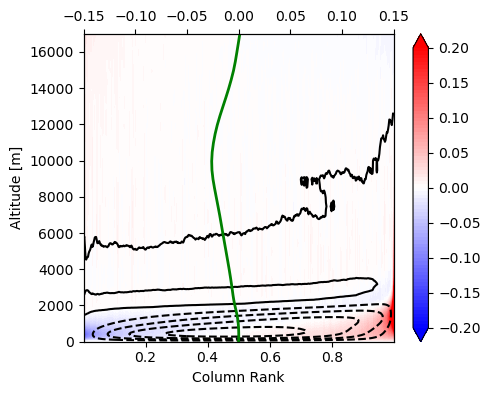

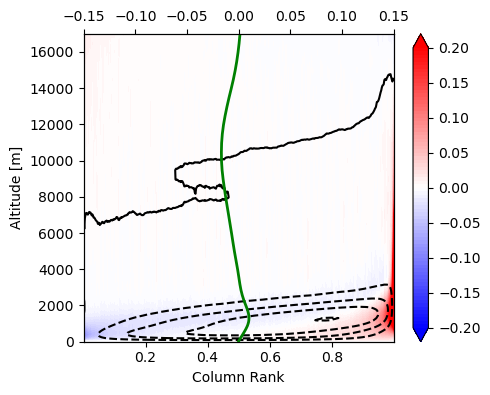

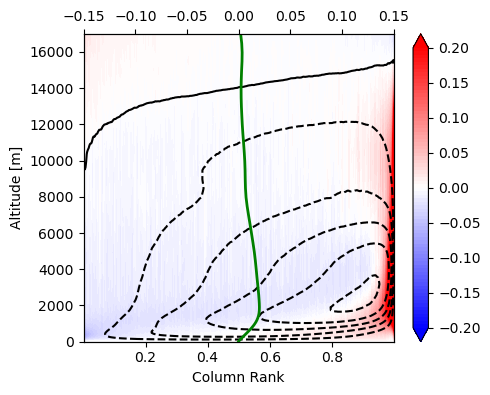

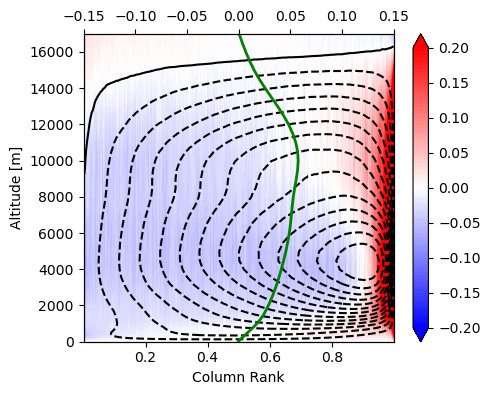

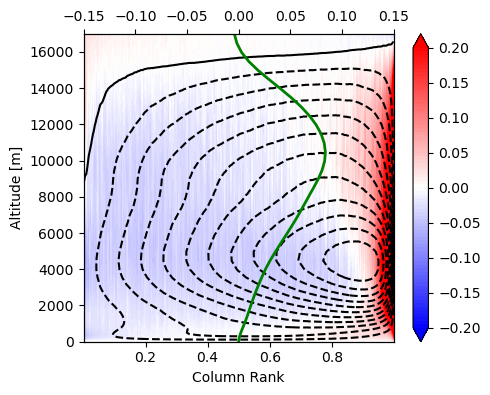

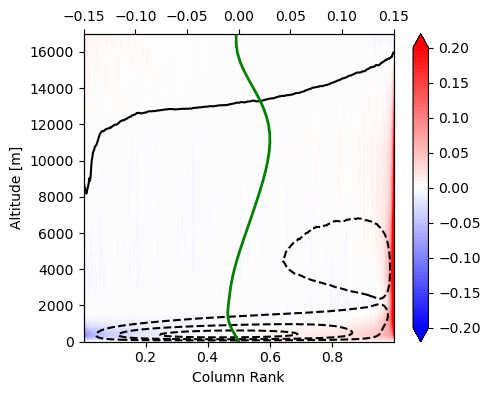

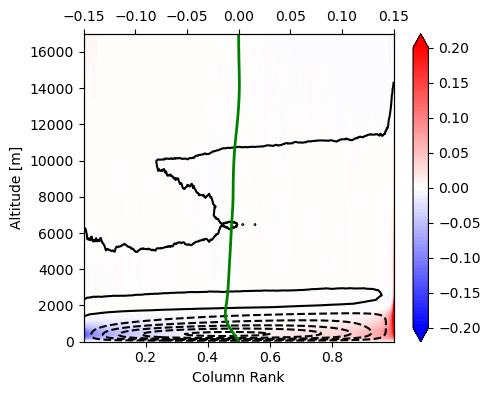

In [48]:
# Set plotting parameters
#
cmap = plt.cm.bwr
lev_min, lev_max, delta_lev = -0.2, 0.2, 0.005
norm = colors.TwoSlopeNorm(vmin=lev_min, vcenter=0, vmax=lev_max)
levels = np.arange(lev_min, lev_max + delta_lev, delta_lev)

for phase in range(1, 9):
    fig, ax = plt.subplots(figsize=(5, 4))
    # Plot anomalous vertical velocity
    #
    w_anom = load_phase_composite_anomaly('wa', phase=phase)
    w_anom = w_anom.coarsen({'column': 5}).mean()
    w_anom.plot.contourf(ax=ax, y='z', cmap=cmap, norm=norm, extend='both', levels=levels, cbar_kwargs={'label': None, 'ticks': levels[::10]})
    # Plot mean vertical velocity
    #
    w_mean = load_phase_composite_mean('wa', phase=phase)
    ax2 = ax.twiny()
    w_mean.plot(ax=ax2, y='z', color='green', lw=2)
    ax2.set_xlim(-0.15, 0.15)
    ax2.set_xlabel(r'$\bar{w}$ [m/s]')
    ax2.set_xlabel(None)
    # Plot circulation
    #
    circ = load_phase_composite_anomaly('wa', phase=phase).cumsum('column')
    circ = circ.coarsen({'column': 5}).mean()
    circ.plot.contour(ax=ax, y='z', levels=np.linspace(-150, 0, 20), colors='black')
    # Label axes
    #
    ax.set_ylabel('Altitude [m]')
    ax.set_xlabel('Column Rank')
    ax.set_ylim(0, 17e3)


# Moist static energy

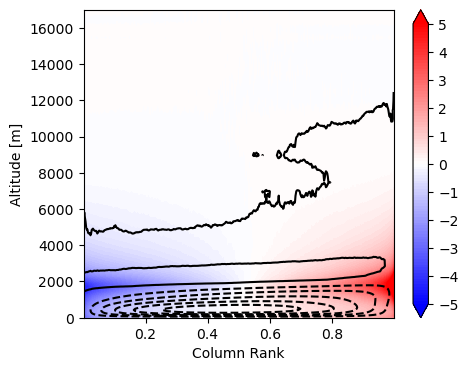

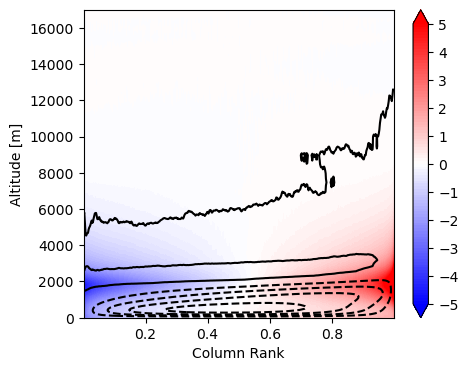

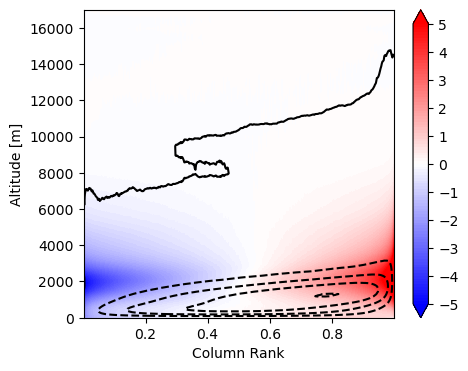

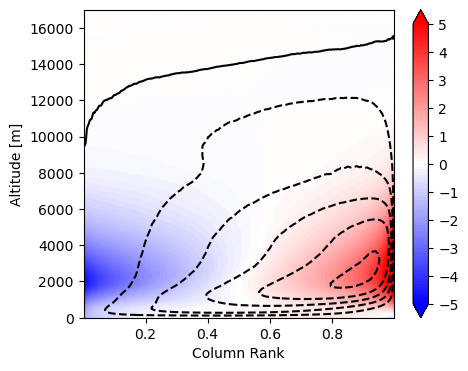

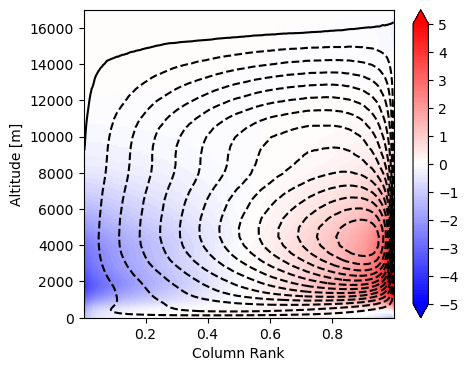

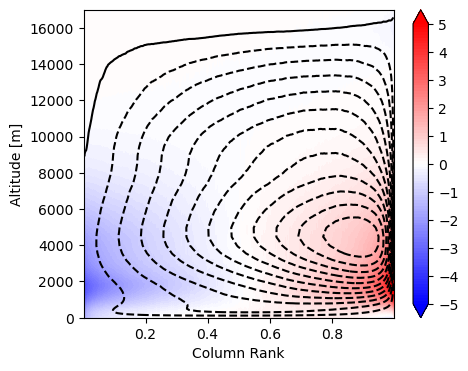

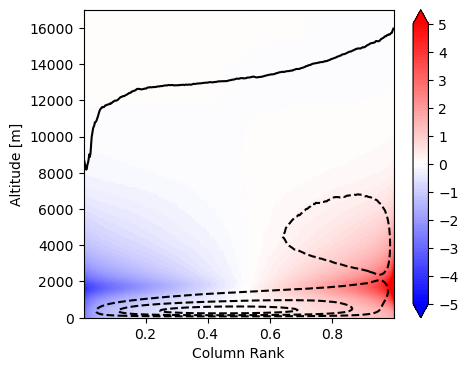

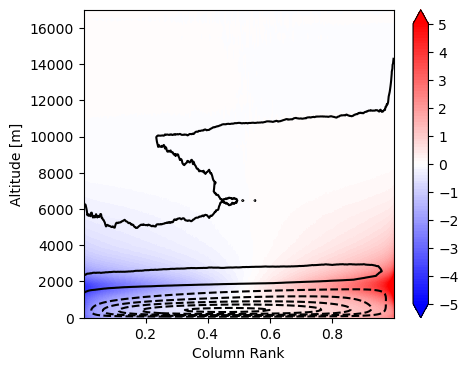

In [ ]:
# Set plotting parameters
#
cmap = plt.cm.bwr
lev_min, lev_max, delta_lev = -5 , 5, 0.1
norm = colors.TwoSlopeNorm(vmin=lev_min, vcenter=0, vmax=lev_max)
levels = np.arange(lev_min, lev_max + delta_lev, delta_lev)

for phase in range(1, 9):
    fig, ax = plt.subplots(figsize=(5, 4))
    # Plot anomalous MSE
    #
    qv_anom = 1e-3*load_phase_composite_anomaly('hus', phase=phase) # in kg/kg
    t_anom = load_phase_composite_anomaly('ta', phase=phase)
    mse_anom = ((1004 * t_anom) + (2.5e6 * qv_anom)) / 1000 # in kJ/kg
    mse_anom = mse_anom.coarsen({'column': 5}).mean()
    mse_anom.plot.contourf(ax=ax, y='z', cmap=cmap, norm=norm, extend='both', levels=levels, cbar_kwargs={'label': None, 'ticks': levels[::10]})
    # Plot circulation
    #
    circ = load_phase_composite_anomaly('wa', phase=phase).cumsum('column')
    circ = circ.coarsen({'column': 5}).mean()
    circ.plot.contour(ax=ax, y='z', levels=np.linspace(-150, 0, 20), colors='black')
    # Label axes
    #
    ax.set_ylabel('Altitude [m]')
    ax.set_xlabel('Column Rank')
    ax.set_ylim(0, 17e3)


# Cloud content

/Users/pedro/miniconda3/envs/scale_interaction_in_gsam/lib/python3.13/site-packages/xarray/plot/dataarray_plot.py:2139: UserWarning: Log scale: values of z <= 0 have been masked
  primitive = ax.contourf(x, y, z, **kwargs)
/Users/pedro/miniconda3/envs/scale_interaction_in_gsam/lib/python3.13/site-packages/xarray/plot/dataarray_plot.py:2139: UserWarning: Log scale: values of z <= 0 have been masked
  primitive = ax.contourf(x, y, z, **kwargs)
/Users/pedro/miniconda3/envs/scale_interaction_in_gsam/lib/python3.13/site-packages/xarray/plot/dataarray_plot.py:2139: UserWarning: Log scale: values of z <= 0 have been masked
  primitive = ax.contourf(x, y, z, **kwargs)
/Users/pedro/miniconda3/envs/scale_interaction_in_gsam/lib/python3.13/site-packages/xarray/plot/dataarray_plot.py:2139: UserWarning: Log scale: values of z <= 0 have been masked
  primitive = ax.contourf(x, y, z, **kwargs)
/Users/pedro/miniconda3/envs/scale_interaction_in_gsam/lib/python3.13/site-packages/xarray/plot/dataarray_pl

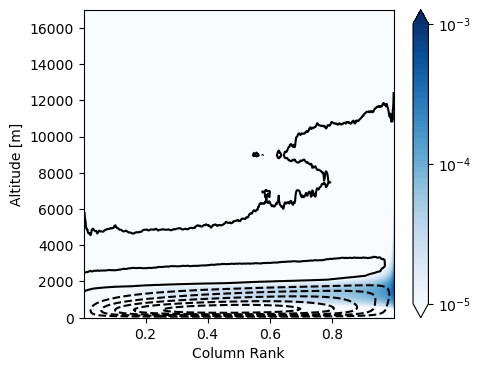

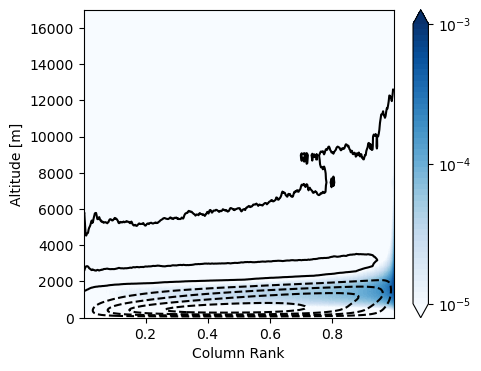

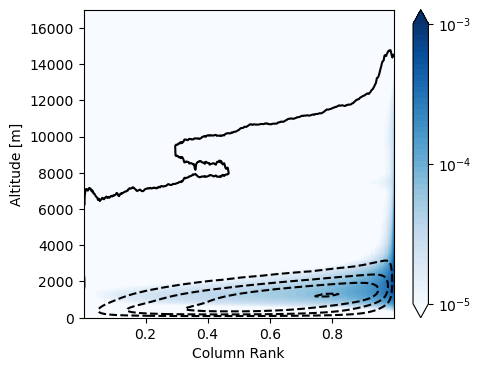

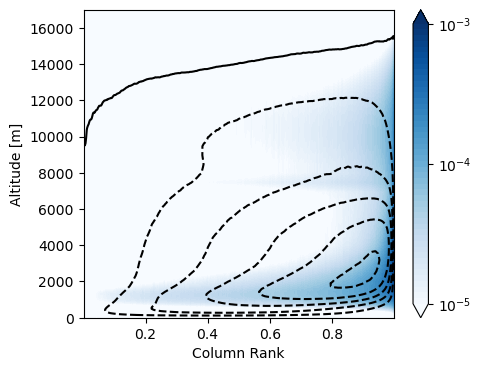

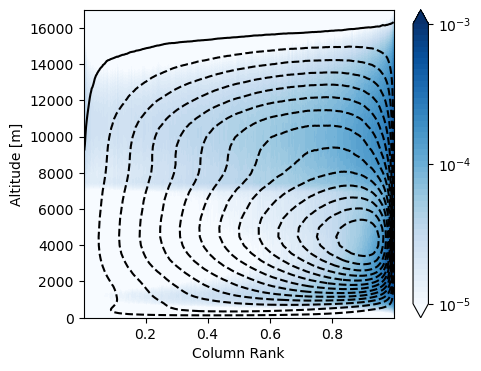

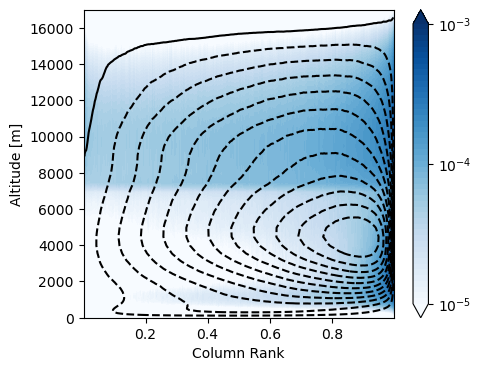

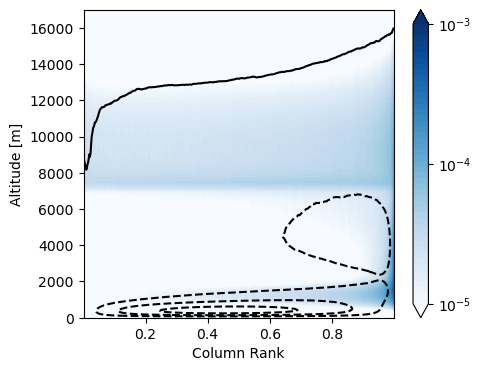

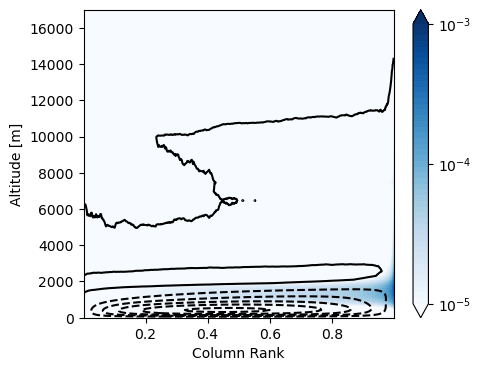

In [81]:
# Set plotting parameters
#
cmap = plt.cm.Blues
lev_min, lev_max = 1e-5 , 1e-3,
norm = colors.LogNorm(vmin=lev_min, vmax=lev_max)
levels = np.logspace(np.log10(lev_min), np.log10(lev_max), 50)

for phase in range(1, 9):
    fig, ax = plt.subplots(figsize=(5, 4))
    # Plot anomalous MSE
    #
    clw = 1e-3*load_phase_composite('clw', phase=phase) # in kg/kg
    cli = 1e-3*load_phase_composite('cli', phase=phase) # in kg/kg
    cloud_cond = clw + cli
    cloud_cond = cloud_cond.coarsen({'column': 5}).mean()
    cloud_cond.plot.contourf(ax=ax, y='z', cmap=cmap, norm=norm, extend='both', levels=levels, cbar_kwargs={'label': None, 'ticks': [1e-5, 1e-4, 1e-3]})
    # Plot circulation
    #
    circ = load_phase_composite_anomaly('wa', phase=phase).cumsum('column')
    circ = circ.coarsen({'column': 5}).mean()
    circ.plot.contour(ax=ax, y='z', levels=np.linspace(-150, 0, 20), colors='black')
    # Label axes
    #
    ax.set_ylabel('Altitude [m]')
    ax.set_xlabel('Column Rank')
    ax.set_ylim(0, 17e3)
